<a href="https://colab.research.google.com/github/mrinconp/Estadistica-I-y-II/blob/master/Estad%C3%ADstica_descriptiva_para_variables_cualitativas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis descriptivo para estadísticas vitales en Colombia

# Introducción

Frente a la disminución de la tasa de nacimiento en Colombia en los últimos años [1], las instituciones de salud deben dirigir esfuerzos hacia el bienestar de los recién nacidos y el acceso a servicios de salud para las familias. Con esto en mente, la comprensión de relaciones entre factores propios del recién nacido como lo son su peso, talla, entre otros, ofrece información valiosa sobre el desarrollo fetal y posibles predicciones; por ejemplo, un bajo peso y una baja talla son indicadores de alerta relacionados con complicaciones de salud a largo plazo. Adicionalmente, es de atención para la toma de medidas de carácter político-social las posibles relaciones entre factores socioeconómicos y las estadísticas vitales de un recién nacido, como lo puede ser el acceso a atención médica, la nutrición de la madre, entre otros.

Así, el presente trabajo es un análisis descriptivo de algunas de las variables de nacimiento recopiladas por el DANE en el año 2020 en el marco de Estadísticas Vitales, a través de la Coordinación de Demografía. Mediante el uso del lenguaje Python se obtienen gráficos, tablas de contingencia e índices de correlación, independencia y asociación para las variables "Tiempo de gestación" y "Talla de nacimiento" para discutir y generar resultados enfocados a su aplicación en el diseño de planes de salud y política social.

## Diseño estadístico
La recopilación de datos se basa en el registro continuo sobre la ocurrencia de cada hecho vital a través de los certificados de nacido vivo, cuya diligenciación está bajo responsabilidad del Ministerio de Salud y Protección Social (MSPS). Una vez diligenciado el certificado, se realiza el ingreso en el sistema RUAF-ND donde se realiza control de calidad bajo una muestra de certificados representativa, esto con el fin de evaluar los procesos de
diligenciamiento, critica, codificación y captura de la información. Finalmente se guarda una copia de la tabla de datos definitiva en el servidor de Estadísticas Vitales para hacerlas de libre acceso en el Banco de Datos del DANE. [2][3]


## Carga de librerías y archivos

In [1]:
from google.colab import files # Para cargar archivos en google colab
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math

In [2]:
uploaded = files.upload()

Saving nac2020.csv to nac2020.csv


In [3]:
io_csv = io.BytesIO(uploaded['nac2020.csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')

## Obtención de datos y valores de interés

Se consideran únicamente las variables "Tiempo de Gestación" y "Talla de nacimiento" de la base de datos cargada previamente. A partir de la información de las variables en el archivo de datos del DANE [4], la variable "Tiempo de Gestación" se encuentra en la base de datos como "T_GES" y toma los siguientes valores:

* 1 = Menos de 22
* 2 = De 22 a 27
* 3 = De 28 a 37
* 4 = De 38 a 41
* 5 = De 42 y más
* 6 = Ignorado
* 9 = Sin información

Para la variable "Talla de nacimiento", "TALLA_NAC" en la base de datos, se tienen los valores (en cm):

* 1 = Menos de 20
* 2 = 20-29
* 3 = 30-39
* 4 = 40-49
* 5 = 50-59
* 6 = 60 y Más.
* 9 = Sin información

Con el fin de trabajar únicamente con los datos que brindan información de ambas variables, se consideran únicamente los valores menores a 6 para el tiempo de gestación y los valores menores a 9 para la talla de nacimiento todos como tipo ```str```




In [6]:
tabla1 = tabla[["T_GES","TALLA_NAC"]]
df1 = tabla1[(tabla1.T_GES < 6) & (tabla1.TALLA_NAC < 9)]

#Convertir valores a tipo str
df1.T_GES = df1.T_GES.astype(str)
df1.TALLA_NAC = df1.TALLA_NAC.astype(str)

<ipython-input-6-ca3d6d29f711>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.T_GES = df1.T_GES.astype(str)
<ipython-input-6-ca3d6d29f711>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TALLA_NAC = df1.TALLA_NAC.astype(str)


Seguido a esto, se cambian los valores del rango de la variable por los respectivos intervalos que representan

In [7]:
df1.loc[(df1.T_GES == "1"), "T_GES"], df1.loc[(df1.T_GES == "2"), "T_GES"], df1.loc[(df1.T_GES == "3"), "T_GES"], df1.loc[(df1.T_GES == "4"), "T_GES"], df1.loc[(df1.T_GES == "5"), "T_GES"] = "0-22", "22-27", "28-37", "38-41", "42+"
df1.loc[df1.TALLA_NAC == "1", "TALLA_NAC"], df1.loc[df1.TALLA_NAC == "2", "TALLA_NAC"], df1.loc[df1.TALLA_NAC == "3", "TALLA_NAC"] = "0-20", "20-29", "30-39"
df1.loc[df1.TALLA_NAC == "4", "TALLA_NAC"], df1.loc[df1.TALLA_NAC == "5", "TALLA_NAC"], df1.loc[df1.TALLA_NAC == "6", "TALLA_NAC"] = "40-49", "50-59", "60+"
df1.head(3)

,T_GES,TALLA_NAC
COD_DPTO,,
52,38-41,40-49
20,38-41,50-59
27,38-41,50-59


# Medidas descriptivas para la variable "Tiempo de Gestación"

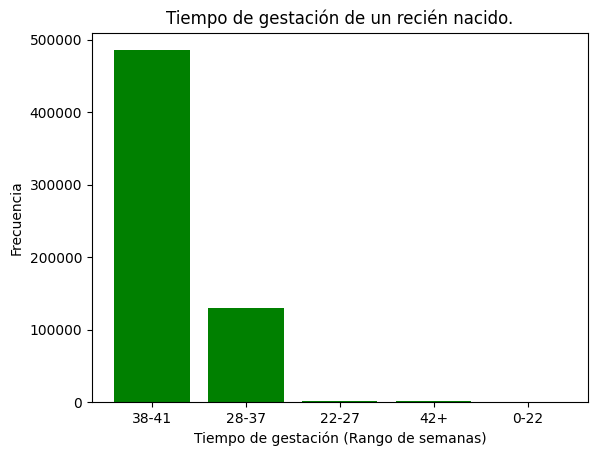

In [8]:
x_values = df1.T_GES.unique()
y_values = df1.T_GES.value_counts().tolist()
plt.bar(x_values, y_values, color = "green")
plt.title('Tiempo de gestación de un recién nacido.')
ax = plt.subplot()  # Axis
ax.set_xlabel('Tiempo de gestación (Rango de semanas)')
ax.set_ylabel('Frecuencia')
plt.show()

Tenemos que entre las 38 y 41 semanas es el tiempo de gestación mas frecuente, donde tenemos aproximadamente de 470000 recien nacidos. Tambien de las 28 a las 37 semanas se tienen alrededor de 120000 recien nacidos. En los rangos de 22 a 27 semanas, de 0 a 22 semanas y mas de 42 semanas hay aproximadamente menos de 5000 recien nacidos.

In [9]:
sizes = np.array(y_values)
sizes = pd.DataFrame(data = y_values, index = x_values, columns = ["Frecuencia"])
sizes = sizes.reindex(["0-22", "22-27", "28-37", "38-41", "42+"])
sizes.head()

,Frecuencia
0-22,28
22-27,2236
28-37,130485
38-41,485433
42+,1163


In [10]:
#Frecuencia acumulada
ind = ["0-22", "22-27", "28-37", "38-41", "42+"]
frecuencias = sizes.Frecuencia
fre_acum = []
for i in ind:
  if len(fre_acum) == 0:
    fre_acum.append(frecuencias[i])
  else:
    fre_acum.append(fre_acum[-1]+frecuencias[i])

sizes2 = pd.DataFrame(data = fre_acum, index = ind, columns = ["Frecuencia acumulada"])
sizes2.head()


,Frecuencia acumulada
0-22,28
22-27,2264
28-37,132749
38-41,618182
42+,619345


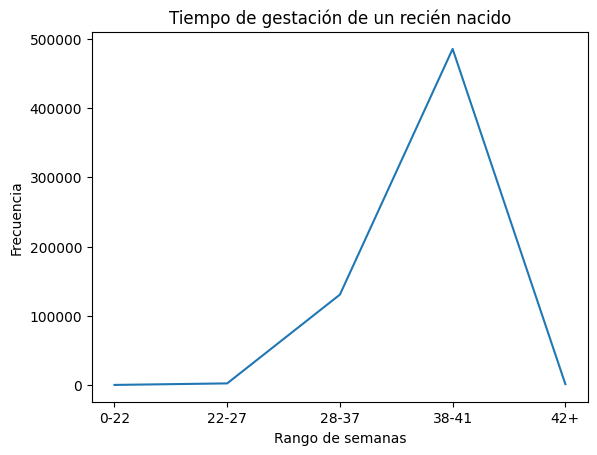

In [11]:
plt.plot(sizes)
plt.title("Tiempo de gestación de un recién nacido")
ax = plt.subplot()
ax.set_xlabel("Rango de semanas")
ax.set_ylabel("Frecuencia")
plt.show()

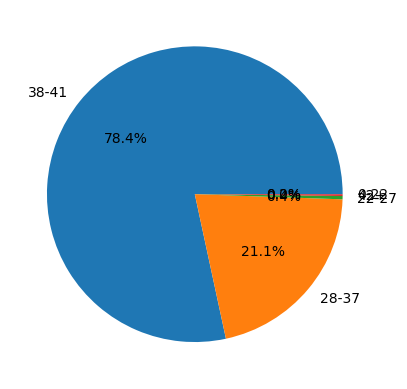

In [12]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()

In [13]:
porcentaje = [(x/len(df1.T_GES)*100) for x in y_values]
porcentaje = pd.DataFrame(data = porcentaje, index = x_values, columns = ["Porcentaje"])
porcentaje.head()


,Porcentaje
38-41,78.378448
28-37,21.068225
22-27,0.361027
42+,0.187779
0-22,0.004521


Alrededor de 78.37% de los recien nacido tuvieron un tiempo de gestacion de 38 a 41 semanas, el 21.06% de los recien nacidos tuvieron de 28 a 37 semanas, el 0.36% tuvieron de 22-27 semanas, el 0.18% tuvieron mas de 42 semanas y el 0.004% tuvieron de 0 a 22 semanas de gestación.

# Medidas descriptivas para la variable "Talla de nacimiento"

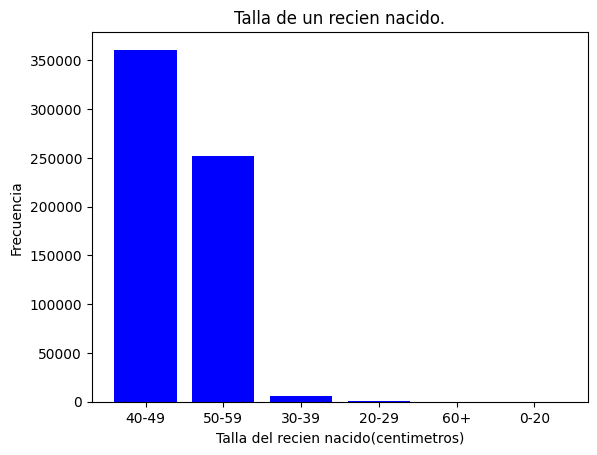

In [14]:
x_values = df1.TALLA_NAC.unique()
y_values = df1.TALLA_NAC.value_counts().tolist()
plt.bar(x_values, y_values, color = "blue")
plt.title('Talla de un recien nacido.')
ax = plt.subplot()  # Axis
ax.set_xlabel('Talla del recien nacido(centimetros)')
ax.set_ylabel('Frecuencia')
plt.show()

Dado el gráfico de barras, se muestra que la talla más frecuente que presentan los recién nacidos en Colombia está entre los 40-49 centímetros, donde tenemos aproximadamente 360,000 recién nacidos. Entre las tallas 50-59 se encuentra la segunda más frecuente con aproximadamente 250,000 recién nacidos. Por último, tenemos las tallas 0-39, donde hay aproximadamente 6,000 recién nacidos en Colombia.

In [15]:
sizes = np.array(y_values)
sizes = pd.DataFrame(data = y_values, index = x_values, columns = ["Frecuencia"])
sizes = sizes.reindex(["0-20", "20-29", "30-39", "40-49", "50-59", "60+"])
sizes.head()

,Frecuencia
0-20,2
20-29,411
30-39,5695
40-49,361010
50-59,252113


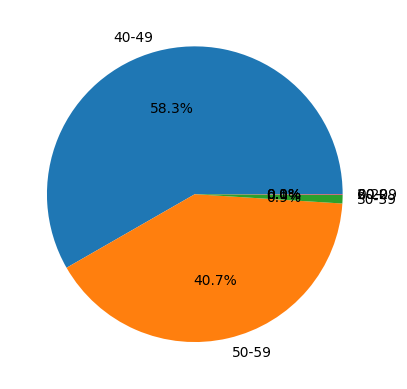

In [16]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()

In [17]:
porcentaje = [(x/len(df1.TALLA_NAC)*100) for x in y_values]
porcentaje = pd.DataFrame(data = porcentaje, index = x_values, columns = ["Porcentaje"])
porcentaje.head()

,Porcentaje
40-49,58.288999
50-59,40.706391
30-39,0.919520
20-29,0.066360
60+,0.018407


Aproximadamente el 58.22% de los recién nacidos en Colombia presentan una talla entre 40 y 49 centímetros. El 40.76% de los recién nacidos tienen una talla entre 50 y 59 centímetros. Alrededor del 0.92% miden entre 30 y 39 centímetros, el 0.07% entre 20 y 29 centímetros, el 0.02% miden más de 60 centímetros, y se registró que solo 2 recién nacidos, que equivalen al 0.00032%, tenían tallas entre 0 y 20 centímetros.

#Análisis de independencia, asociación u homogeneidad

A partir de los valores de las variables consideradas anteriormente, se realiza la tabla de contingencia y se busca determinar si existe un grado de independencia, asociación u homogeneidad.

In [18]:
tabla_cont = pd.crosstab(df1.TALLA_NAC, df1.T_GES)
tabla_cont

T_GES,0-22,22-27,28-37,38-41,42+
TALLA_NAC,,,,,
0-20,0,2,0,0,0
20-29,22,260,53,76,0
30-39,6,1872,3619,198,0
40-49,0,102,89212,162543,256
50-59,0,0,37593,322515,902
60+,0,0,8,101,5


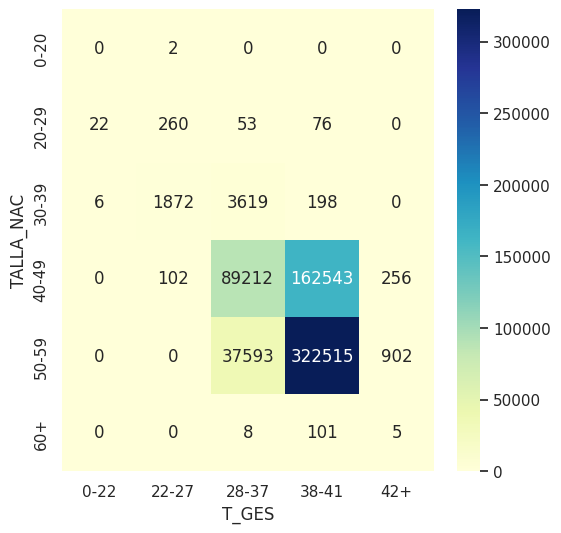

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(tabla_cont,  annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.show()

In [20]:
prob1 = tabla_cont['38-41']['50-59']/tabla_cont['38-41'].sum()
prob2 = tabla_cont['38-41']['40-49']/tabla_cont['38-41'].sum()
porc1 = tabla_cont['38-41']['50-59']/len(df1.TALLA_NAC)


print(f"La probabilidad de que un recién nacido tenga una talla entre 50 y 59 cm una vez se tiene un tiempo de gestación entre 38 y 41 semanas es de {prob1*100} %")
print(f"La probabilidad de que un recién nacido tenga una talla entre 40 y 49 cm una vez se tiene un tiempo de gestación entre 38 y 41 semanas es de {prob2*100} %")
print(f"El {porc1*100} % de los recién nacidos en Colombia tienen un tiempo de gestación entre 38 y 41 semanas y una talla entre 50 y 59 cm")

La probabilidad de que un recién nacido tenga una talla entre 50 y 59 cm una vez se tiene un tiempo de gestación entre 38 y 41 semanas es de 66.43862283775516 %
La probabilidad de que un recién nacido tenga una talla entre 40 y 49 cm una vez se tiene un tiempo de gestación entre 38 y 41 semanas es de 33.48412654269487 %
El 52.073561585223096 % de los recién nacidos en Colombia tienen un tiempo de gestación entre 38 y 41 semanas y una talla entre 50 y 59 cm


A partir de la tabla de contingencia, se determina que el

Dada la naturaleza de las variables, y por tratarse de mediciones de características diferentes, se descarta la posibilidad de que las variables sean homogéneas. Como el tiempo de gestación es un factor determinante para el desarrollo apropiado del feto se plantea la hipótesis de una dependencia entre las variables, para lo cual se realiza el test de Chi cuadrado para las hipótesis:

* H_0: La talla de un recién nacido y el tiempo de gestación son independientes.
* H_a: La talla de un recién nacido depende del tiempo de gestación.

In [21]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"El valor de la estadística Chi cuadrado es {chi} y el valor p es de {valor_p}")

El valor de la estadística Chi cuadrado es 305687.2032391817 y el valor p es de 0.0


Como el valor p $≈0 < 0.05$ entonces se rechaza la hipótesis nula, es decir, se rechaza con una confianza del 95% que la talla de un recién nacido y el tiempo de gestación de recién nacidos en Colombia sean variables independientes.

Naturalmente, es de interés el grado dependencia de las dos variables, para lo cual se calcula el coeficiente de contingencia, el coeficiente de Phi, y el coeficiente V de Cramer:

In [22]:
coeficiente_contingencia = math.sqrt(chi/(chi + len(df1.T_GES)))
coeficiente_phi = math.sqrt(chi/len(df1.T_GES))
coeficiente_v_cramer = math.sqrt(chi/(len(df1.T_GES)*min(6-1, 5-1)))
print(f"Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_cramer}")

Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por 0.5748575017974197, 0.7025420300976798 y 0.3512710150488399


Se observa que no hay un resultado conciso sobre el grado de dependencia entre las variables. Este hecho se atribuye a que el coeficiente de contigencia, Phi y V de Cramer se utilizan para variables nominales como lo son la hemoclasificación y el factor RH de un recién nacido; sin embargo, las variables "Talla" y "Tiempo de gestación" son de naturaleza ordinal pues se consideran variables cualitativas cuyos posibles valores tienen un orden. [5]

De esta manera, y tomando como referencia el trabajo de Rodriguez y Mora en el 2001 [6] para variables ordinales, se calculan los estadísticos D de Somers $(\tau)$ y Tau-b de Kendall $(\tau_b)$ con la librería Scipy:

In [23]:
stats.somersd(tabla_cont)

SomersDResult(statistic=0.2733481174604542, pvalue=0.0, table=array([[     0,      2,      0,      0,      0],
       [    22,    260,     53,     76,      0],
       [     6,   1872,   3619,    198,      0],
       [     0,    102,  89212, 162543,    256],
       [     0,      0,  37593, 322515,    902],
       [     0,      0,      8,    101,      5]]))

In [24]:
stats.kendalltau(df1.TALLA_NAC, df1.T_GES)

SignificanceResult(statistic=0.3290215473173703, pvalue=0.0)

Como $0.2 \leq \tau, \tau_b \leq 0.4$ y de acuerdo con el trabajo de Landiy Koch (1977) [7], se determina que la talla de nacimiento de un recién nacido depende moderadamente del tiempo de gestación.

#Discusión de resultados
En el análisis descriptivo de la variable "Tiempo de gestación de un recién nacido" se puede observar que el rango de semanas mas común de nacimientos es de 38 a 41 semanas con un 78.37% y el segundo más común es de 28 a 37 semanas con un 21.06% de los recién nacidos. A partir de las 42 semanas se evidencia una menor cantidad de recién nacidos con 0.18%, esto se puede deber a que las complicaciones en un embarazo de más 42 semanas pueden ser mayores y que la tasa de mortalidad es el doble a la de un embarazo a término (Hernández PTG, Nachón GMG., 2005)[11]. En el rango de 22 a 27 semanas hay una menor cantidad de recién nacidos con 0.36% y de las semanas 0 a 22 se encuentran aún menos recién nacidos con 0.004%, esto puede ser debido a que los nacimientos prematuros (entre 0 a 37 semanas) representan más del 75% de la mortalidad perinatal [12].

Para la variable cualitativa "Talla de un recién nacido", se observa que la mayoría de los bebés tienen tallas dentro del rango de 40 a 49 centímetros, con 361,456 recién nacidos registrados en este intervalo, lo que indica una clara moda en esa categoría. Aunque este rango es predominante, también se identifican recién nacidos en otros rangos de tallas, desde 50 hasta 59, evidenciando cierta variabilidad en las medidas. Se puede evidenciar gracias a la grafica de pastel que solo 0.07% de recien nacidos presentaron una talla entre 0 y 29 centimetros, esto pudo haber ocurrido por diversas razones por ejemplo: Restricción del crecimiento intrauterino(RCIU), anomalías genéticas, prematuridad extrema o complicaciones médicas maternas. También se pudo notar que es atípico que un recien nacido presente una talla de más de 60 centimetros, esto pudo haber sido causado por diversas razones como por ejemplo: una Macrosomía fetal, Genética o Edad de la madre avanzada. Estos hallazgos son cruciales para entender el desarrollo físico primario de los bebés, tener una moda claramente definida en el rango de 40 a 49 sugiere que la mayoría de los bebés en la muestra están dentro de un rango típico de desarrollo físico inicial.

Al obtener resultados sobre la relación de dependencia entre las variables, se encontró una dependencia moderada mediante el estadístico D de Somers y Tau-b de Kendall. Es de importancia notar que este resultado considera la totalidad de los datos incluyendo posibles datos no representativos. Ahora, si bien se planteó inicialmente que la talla depende del tiempo de gestación, dado el bajo grado de dependencia, se considera que una relación de asociación es más concisa con los resultados. Esto último da lugar a que otras variables influyan en la talla de un recién nacido: por ejemplo, entre los factores considerados causales de talla baja prenatal (hipocrecimientos de inicio prenatal), se encuentran agresiones al ambiente fetal, defectos genéticos, malnutrición y consumo de drogas, entre otros (Pozo, 2015) [8]. Aún así, la asociación de las variables da sentido a las observaciones generadas para la tabla de contingencia, por ejemplo, cerca del 66% de los recién nacidos con un tiempo de gestación normal (entre 37 y 42 semanas [9]) tienen una talla considerada sana (entre 44 y 53 cm [10]). Adicionalmente, se observa que al ser menor de 37 semanas el tiempo de gestación, se encuentran menores tallas con mayor frecuencia.

#Conclusiones
Debido a que el 78.37% de recien nacidos nacen en el rango de 38 a 41 semanas esto nos indica que el promedio de gestación para los embarazos es de 9 meses. De igual manera hay que tener en cuenta que hay un 21.06% de los recien nacidos que nacen prematuramente. Ademas es importante considerar la poca cantidad de nacimientos despues de las 42 semanas siendo estos un 0.18% de los recien nacidos, podemos atribuir esto a los riesgos que conlleva un embarazo de mas de 42 semanas como se cito anteriormente.

Gracias al gráfico de pastel y a las frecuencias porcentuales, se pudo evidenciar que la mayoría de los recién nacidos en Colombia presentan una talla entre 30 y 59 centímetros. Dado que esto representa aproximadamente el 99.91% de los recién nacidos en Colombia, podemos concluir que es atípico que un recién nacido presente una talla de menos de 29 centímetros o mayor a 60 centímetros.


La revisión sobre relaciones de asociación o dependencia entre las variables sugiere una asociación moderada, es decir, si bien se observa que un recién nacido con entre 37 y 42 semanas de gestación presenta en la mayoría de los casos una talla normal, aún hay casos de baja talla cuya causa se atribuye a factores externos durante el embarazo según la literatura. Adicionalmente, se encontró que cerca del 52% de recién nacidos en Colombia tienen tiempos de gestación y tallas consideradas sanas o ideales. Se considera que sigue siendo necesario el desarrollo de campañas de educación sobre nutrición y manejo de drogas para mujeres embarazadas con el fin de eliminar variables que influyan en posibles patologías relacionadas con la talla del bebé.

# Bibliografía

* [1] Departamento Administrativo Nacional de Estadística (2023). Boletín técnico - Estadísticas Vitales (EEVV) Nacimientos en Colombia.[Link](https://www.dane.gov.co/files/operaciones/EEVV/bol-EEVV-Nacimientos-IIItrim2023.pdf)
* [2] Departamento Administrativo Nacional de Estadística - Dirección de censos y demografía (2020). Metodología de las estadísticas vitales. [Link](https://www.dane.gov.co/files/investigaciones/fichas/poblacion/metodologia-eevv.pdf)
* [3] Departamento Administrativo Nacional de Estadística - Dirección de censos y demografía (2009). Estadísticas vitales - EEVV. [Link](https://www.dane.gov.co/files/investigaciones/fichas/Estadisticas_vitales.pdf)
* [4] Departamento Administrativo Nacional de Estadística - Dirección de Censos y demografía (2022). Estadísticas Vitales - EEVV - 2020. Diccionario de Datos. [Link](https://microdatos.dane.gov.co/index.php/catalog/732/data-dictionary/F25?file_name=nac2020)
* [5] Gonzales G., Johnnalid (2018). Coeficientes Correlación:
Phi, Contingencia, Biserial, Spearman. Universidad Central de Venezuela. [Link](http://saber.ucv.ve/bitstream/10872/18490/1/Otros%20Coeficientes%20Correlaci%C3%B3n_FHE_UCV.pdf)
* [6] Jaume, M. R., & Catalá, R. M. (2001). Estadística informática: casos y ejemplos con el SPSS. Dialnet. [Link](https://dialnet.unirioja.es/servlet/libro?codigo=583568)
* [7] Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174. [Link](https://www.jstor.org/stable/2529310)
* [8] Pozo R., J. (2015). Crecimiento normal y talla baja. [Link](https://www.pediatriaintegral.es/wp-content/uploads/2015/xix06/04/n6-411e1-e23_Talla%20baja_Pozo.pdf)
* [9] Organización Mundial de la Salud (2001). Definitions and indicators in family planning - Maternal & Child health and reproductive health used in the WHO regional office for Europe. [Link](https://iris.who.int/bitstream/handle/10665/108284/e68459.pdf;jsessionid=87B5171E9919C9B07A56107DB74C7EEF?sequence=1)
* [10] Luna Jaspe, H., Ariza Macías, J., Mora Parra, J. O. y Pardo Tellez, F. (1971). Estudio seccional de crecimiento, desarrollo y nutrición en 12.138 niños de Bogotá, Colombia. Revista de la Facultad de Medicina, 37(1), 58–70. [Link](https://revistas.unal.edu.co/index.php/revfacmed/article/view/22106)
* [11] Hernández PTG, Nachón GMG. Conceptos basicos del embarazo prolongado: una revisión. Rev Med UV. 2005;5(2):21-27. [Link](https://www.medigraphic.com/cgi-bin/new/resumenI.cgi?IDARTICULO=28756)
* [12] Goldenberg R. L, Culhane J. F., Iams J. D, Romero R. Epidemiology and causes of preterm birth [Link](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(08)60074-4/fulltext)
* IBM (2023). IBM Documentation - Crosstabs statistics. [Link](https://www.ibm.com/docs/en/spss-statistics/saas?topic=crosstabs-statistics)
*  Laerd Statistics (s.f) Kendall's Tau-b using SPSS Statistics. [Link](https://statistics.laerd.com/spss-tutorials/kendalls-tau-b-using-spss-statistics.php)